In [3]:
import pandas as pd
df = pd.read_csv("./data/house_price.csv")

### Fråga 1
Läs in CSV-filen house_price.csv och visa de första 2 raderna.

In [4]:
df.head(2)

,bedrooms,sq_meter,neighborhood,sales_price
0,3,200,Normalville,250000
1,2,80,Cool Town,300000


### Fråga 2
Visa en statistisk sammanfattning av datasetet för att se medelvärde, standardavvikelse,
min- och maxvärden, etc.

In [64]:
df.describe()

,bedrooms,sq_meter,sales_price,sq_meter_price
count,5.000000,5.000000,5.000000,5.000000
mean,2.400000,124.000000,185600.000000,1786.577540
std,1.140175,70.302916,88525.702482,1156.895629
min,1.000000,55.000000,78000.000000,750.000000
25%,2.000000,80.000000,150000.000000,1250.000000
50%,2.000000,85.000000,150000.000000,1418.181818
75%,3.000000,200.000000,250000.000000,1764.705882
max,4.000000,200.000000,300000.000000,3750.000000


### Fråga 3
Filtrera datasetet för att visa endast hus med mer än 2 sovrum.

In [65]:
df_filterd = df[df["bedrooms"] > 2]
df_filterd

,bedrooms,sq_meter,neighborhood,sales_price,sq_meter_price
0,3,200,Normalville,250000,1250.0
4,4,200,Skid Row,150000,750.0


### Fråga 4
Sortera datasetet baserat på försäljningspriset i stigande ordning.

In [66]:
sales_filter = df.sort_values("sales_price")
sales_filter

,bedrooms,sq_meter,neighborhood,sales_price,sq_meter_price
3,1,55,Normalville,78000,1418.181818
2,2,85,Normalville,150000,1764.705882
4,4,200,Skid Row,150000,750.000000
0,3,200,Normalville,250000,1250.000000
1,2,80,Cool Town,300000,3750.000000


### Fråga 5
Calculate the average sales price for all houses.

In [51]:
sales_average = df["sales_price"].mean()
print(f"Medelvärdet för alla hus priser är {sales_average}$")

Medelvärdet för alla hus priser är 185600.0$


### Fårga 6
Lägg till en ny kolumn som visar priset per kvadratmeter.


In [67]:

# df = df.assign(sq_meter_price = df.sales_price / df.sq_meter)
df["sq_meter_price"] = df["sales_price"] / df["sq_meter"]
df

,bedrooms,sq_meter,neighborhood,sales_price,sq_meter_price
0,3,200,Normalville,250000,1250.000000
1,2,80,Cool Town,300000,3750.000000
2,2,85,Normalville,150000,1764.705882
3,1,55,Normalville,78000,1418.181818
4,4,200,Skid Row,150000,750.000000


### Fråga 7
Gruppera datasetet efter grannskap och beräkna det genomsnittliga försäljningspriset för
varje grannskap.

In [73]:
# Gruppera efter granskap
df_grouped = df.groupby("neighborhood")["sales_price"].mean().reset_index()
df_grouped

,neighborhood,sales_price
0,Cool Town,300000.000000
1,Normalville,159333.333333
2,Skid Row,150000.000000


### Fråga 8
Skapa ett enkelt stapeldiagram som visar det genomsnittliga försäljningspriset per
grannskap.

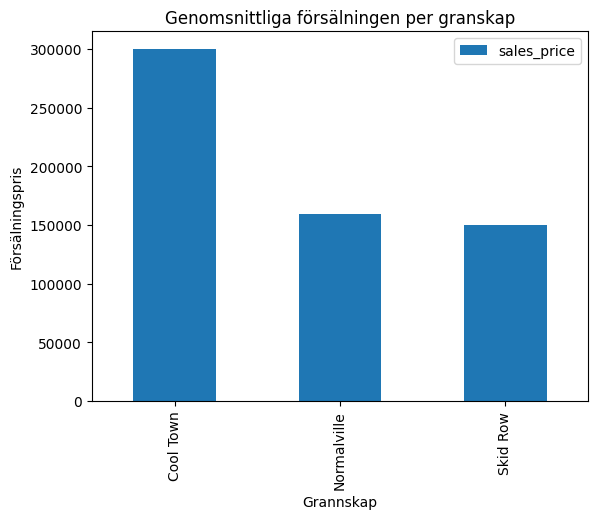

In [75]:
import matplotlib.pyplot as plt

df_grouped = df.groupby("neighborhood")["sales_price"].mean().reset_index()

df_grouped.plot(kind="bar", x="neighborhood", y="sales_price")

plt.title("Genomsnittliga försälningen per granskap")
plt.xlabel("Grannskap")
plt.ylabel("Försälningspris")
plt.show()

### Fråga 9
Hitta huset med det högsta försäljningspriset

In [80]:
# max_sale = df["sales_price"].max()
# print(f"{max_sale}$")

max_price_hous = df[df["sales_price"] == df["sales_price"].max()]
max_price_hous

,bedrooms,sq_meter,neighborhood,sales_price,sq_meter_price
1,2,80,Cool Town,300000,3750.0


### Fråga 10
Export the manipulated DataFrame to a new CSV file.

In [83]:
df
df.to_csv("./data/modifyfiled.csv")
df.to